In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## IMPORTING DEPENDENCIES

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split

## TRAIN, TEST, VALIDATION DATA RETRIEVAL

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Activation, Dropout, GRU, Input, Conv1D, MaxPooling1D, LSTM
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_val.npy')

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


## NEURAL NETWORK MODEL

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Embedding, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [2]:
inputs = Input(shape=(98,1))
conv1 = Conv1D(32, 5, activation='relu',kernel_regularizer=l2(0.01))(inputs)
# conv1 = Conv1D(32, 5, activation='relu', input_shape=(98,1))(inputs)
pool1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(64, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(2)(conv2)
conv3 = Conv1D(128, 5, activation='relu')(pool2)
pool3 = MaxPooling1D(2)(conv3)

gru1 = GRU(128, return_sequences=True)(pool3)
gru1 = Dropout(0.2)(gru1)
lstm1 = LSTM(128)(gru1)

outputs = Dense(2, activation='softmax')(lstm1)

In [3]:
model = Model(inputs = inputs, outputs = outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 98, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 94, 32)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 47, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 21, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 128)           41088 

In [ ]:
optimizer=tf.keras.optimizers.Adam(amsgrad=True, name='Adam')

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer = optimizer,
    metrics=['accuracy']
)

In [ ]:
print("Model Score: \n")
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Model Score: 

Epoch 1/120
528/528 [==============================] - 41s 62ms/step - loss: 0.6466 - accuracy: 0.6175 - val_loss: 0.5731 - val_accuracy: 0.6940
Epoch 2/120
528/528 [==============================] - 33s 62ms/step - loss: 0.4622 - accuracy: 0.7758 - val_loss: 0.3526 - val_accuracy: 0.8424
Epoch 3/120
528/528 [==============================] - 35s 66ms/step - loss: 0.3290 - accuracy: 0.8556 - val_loss: 0.3046 - val_accuracy: 0.8697
Epoch 4/120
528/528 [==============================] - 33s 62ms/step - loss: 0.2891 - accuracy: 0.8747 - val_loss: 0.2694 - val_accuracy: 0.8836
Epoch 5/120
528/528 [==============================] - 33s 63ms/step - loss: 0.2648 - accuracy: 0.8842 - val_loss: 0.2540 - val_accuracy: 0.8875
Epoch 6/120
528/528 [==============================] - 33s 62ms/step - loss: 0.2394 - accuracy: 0.8955 - val_loss: 0.2564 - val_accuracy: 0.8851
Epoch 7/120
528/528 [==============================] - 35s 67ms/step - loss: 0.2265 - accuracy: 0.9019 - val_loss: 

In [ ]:
model.save("/content/gdrive/MyDrive/Models/CRNN-LSTM-GRU-WithoutAttention.h5")
score = model.evaluate(X_test, y_test)
print(score)

66/66 [==============================] - 1s 16ms/step - loss: 0.2904 - accuracy: 0.9564
[0.29038476943969727, 0.9563774466514587]


## METRICS

In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=f7b24c7836bb2e269bd33a576a3f686ec36c5c47c0b08b8258b5dc676c0cd015
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=82602482de0fb9d9525139cd3fd41bb208bd370f14902c88ea46064e41d862a8
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

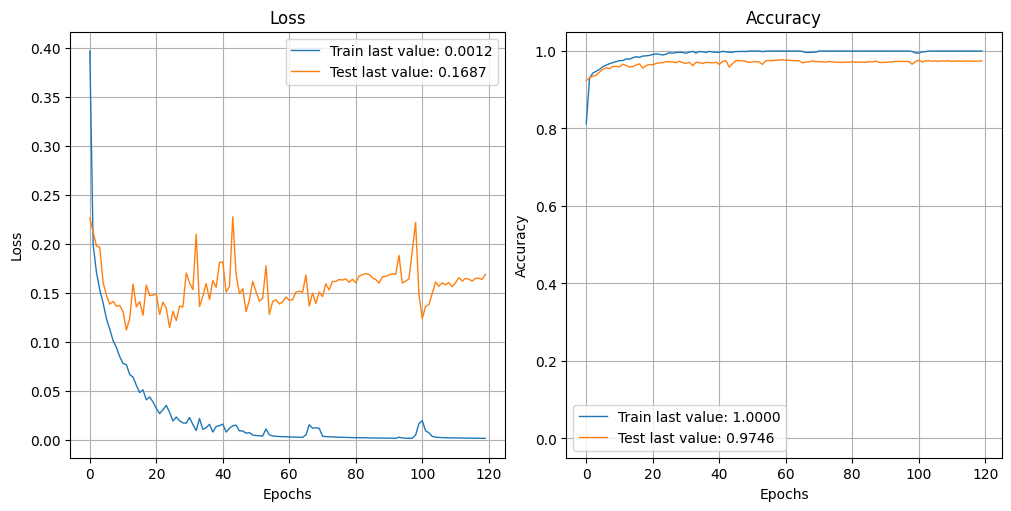

In [ ]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1049
           1       0.98      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1027   22]
 [  18 1042]]


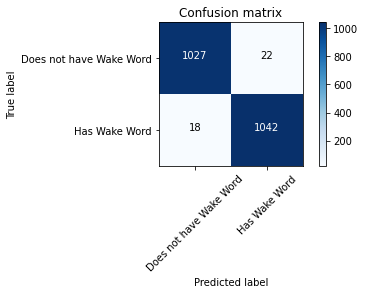

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])

##PREDICTION & LATENCY

In [ ]:
pip install spafe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 KB 8.6 MB/s eta 0:00:00


In [ ]:
import spafe
from spafe.features.lfcc import lfcc
import pywt

In [ ]:
def predict(audio):
  audio_data, sr = librosa.load(audio)

  wavelet = 'db4'
  level = 4
  coeffs = pywt.wavedec(audio_data, wavelet, level=level)
  threshold = np.median(np.abs(coeffs[-level])) / 0.6745
  for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
  denoised_audio = pywt.waverec(coeffs, wavelet)

  lfccs  = lfcc(denoised_audio, fs = sr, num_ceps=13)
  lfccs_processed = np.mean(lfccs.T, axis=0) # some pre-processing
  lfccs_new = np.expand_dims(np.asarray(lfccs_processed), axis=0)
  predictions = model.predict(lfccs_new)
  return predictions

In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/Marvin/marvin (170).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 41ms/step
[[0. 1.]]


In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/False/yes (824).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 45ms/step
[[1. 0.]]
